In [226]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [227]:
size = 40

plt.rcParams.update({
    # taglia della figura
    'figure.figsize': (11,8),

    # font
    'text.usetex': True,
    'font.family': 'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,

    # assi
    'axes.labelsize': size,
    'axes.titlesize': size,
    'axes.linewidth': 2,

    # ticks
    'xtick.labelsize': size,
    'ytick.labelsize': size,
    'xtick.direction': 'in',
    'ytick.direction': 'in',

    # legenda
    'legend.loc': 'best',
    'legend.fontsize': size,

    # plots
    'lines.linewidth': 1.6,
    'scatter.marker': 'o',
    'lines.markersize': 8,
    'scatter.edgecolors': 'black',
})

In [228]:
# dimensions
nk = 100
nz = 20
nc = 2000
ncv = 1000

In [229]:
# i plot di questo notebook hanno un k fisso, in unità di h/Mpc
kk = np.logspace(-4, np.log10(3), nk)*0.67810
zz = np.linspace(0, 5, nz)

$$ NN(k,z) = \frac{P_{CLASS}(k,z)}{P_{prim}(k) \, T_{Pedro}^2(k) \, \mu_{PySR}^2(k,z)} $$

In [230]:
# parametri nn+sr - training dataset

prediz = np.load('../files/pred_nn+sr_' + str(nc) + '.npy')
print('Dim predizione nn+sr: ', prediz.shape)

prim = np.load('../files/train_prim_emul_' + str(nc) + '.npy')
print('Dim spettro primordiale: ', prim.shape)

tf2 = np.load('../files/train_tf2_emul_' + str(nc) + '.npy')
print('Dim transfer: ', tf2.shape)

print()

pred = np.reshape(prediz.T, [nc,nk,nz])
print('Dim predizione nn+sr aggiustata: ', pred.shape)

pkz_class = np.load('../files/train_pkz_emul_' + str(nc) + '.npy')
print('Dim spettro CLASS: ', pkz_class.shape)

mu2 = np.load('../files/train_mu2_emul_' + str(nc) + '.npy')
print('Dim mu: ', mu2.shape)

pkz_prim = np.zeros([nc,nk,nz])
transfer2 = np.zeros([nc,nk,nz])
for i in range(nz) :
    pkz_prim[:,:,i] = prim
    transfer2[:,:,i] = tf2
print('Dim transfer aggiustata: ', transfer2.shape)
print('Dim primordiale aggiustata: ', pkz_prim.shape)

pkz_pred = pred * pkz_prim * transfer2 * mu2
print('Dim spettro predetto nn+sr: ', pkz_pred.shape)

Dim predizione nn+sr:  (2000, 2000)
Dim spettro primordiale:  (2000, 100)
Dim transfer:  (2000, 100)

Dim predizione nn+sr aggiustata:  (2000, 100, 20)
Dim spettro CLASS:  (2000, 100, 20)
Dim mu:  (2000, 100, 20)
Dim transfer aggiustata:  (2000, 100, 20)
Dim primordiale aggiustata:  (2000, 100, 20)
Dim spettro predetto nn+sr:  (2000, 100, 20)


In [231]:
# parametri nn - training dataset

prediz_nn = np.load('../files/pred_nn_asns_' + str(nc) + '.npy')
print('Dim predizione: ', prediz_nn.shape)

print()

pkz_pred_nn = np.reshape(prediz_nn.T, [nc,nk,nz])
print('Dim predizione aggiustata: ', pkz_pred_nn.shape)

pkz_class_nn = np.load('../files/train_pkz_asns_emul_' + str(nc) + '.npy')
print('Dim spettro CLASS: ', pkz_class_nn.shape)

Dim predizione:  (2000, 2000)

Dim predizione aggiustata:  (2000, 100, 20)
Dim spettro CLASS:  (2000, 100, 20)


In [232]:
# parametri nn+sr - validation dataset

prediz_v = np.load('../files/pred_nn+sr_val_' + str(ncv) + '.npy')
print('Dim predizione nn+sr: ', prediz_v.shape)

prim_v = np.load('../files/val_prim_emul_' + str(ncv) + '.npy')
print('Dim spettro primordiale: ', prim_v.shape)

tf2_v = np.load('../files/val_tf2_emul_' + str(ncv) + '.npy')
print('Dim transfer: ', tf2_v.shape)

print()

pred_v = np.reshape(prediz_v.T, [ncv,nk,nz])
print('Dim predizione aggiustata: ', pred_v.shape)

pkz_class_v = np.load('../files/val_pkz_emul_' + str(ncv) + '.npy')
print('Dim spettro CLASS: ', pkz_class_v.shape)

mu2_v = np.load('../files/val_mu2_emul_' + str(ncv) + '.npy')
print('Dim mu: ', mu2_v.shape)

pkz_prim_v = np.zeros([ncv,nk,nz])
transfer2_v = np.zeros([ncv,nk,nz])
for i in range(nz) :
    pkz_prim_v[:,:,i] = prim_v
    transfer2_v[:,:,i] = tf2_v
print('Dim transfer aggiustata: ', transfer2_v.shape)
print('Dim primordiale aggiustata: ', pkz_prim_v.shape)

pkz_pred_v = pred_v * pkz_prim_v * transfer2_v * mu2_v
print('Dim spettro predetto: ', pkz_pred_v.shape)

Dim predizione nn+sr:  (2000, 1000)
Dim spettro primordiale:  (1000, 100)
Dim transfer:  (1000, 100)

Dim predizione aggiustata:  (1000, 100, 20)
Dim spettro CLASS:  (1000, 100, 20)
Dim mu:  (1000, 100, 20)


Dim transfer aggiustata:  (1000, 100, 20)
Dim primordiale aggiustata:  (1000, 100, 20)
Dim spettro predetto:  (1000, 100, 20)


In [233]:
# parametri nn - validation dataset

prediz_nn_v = np.load('../files/pred_nn_asns_val_' + str(ncv) + '.npy')
print('Dim predizione nn: ', prediz_nn_v.shape)

print()

pkz_pred_nn_v = np.reshape(prediz_nn_v.T, [ncv,nk,nz])
print('Dim predizione aggiustata: ', pkz_pred_nn_v.shape)

pkz_class_nn_v = np.load('../files/val_pkz_asns_emul_' + str(ncv) + '.npy')
print('Dim spettro CLASS: ', pkz_class_nn_v.shape)


Dim predizione nn:  (2000, 1000)

Dim predizione aggiustata:  (1000, 100, 20)
Dim spettro CLASS:  (1000, 100, 20)


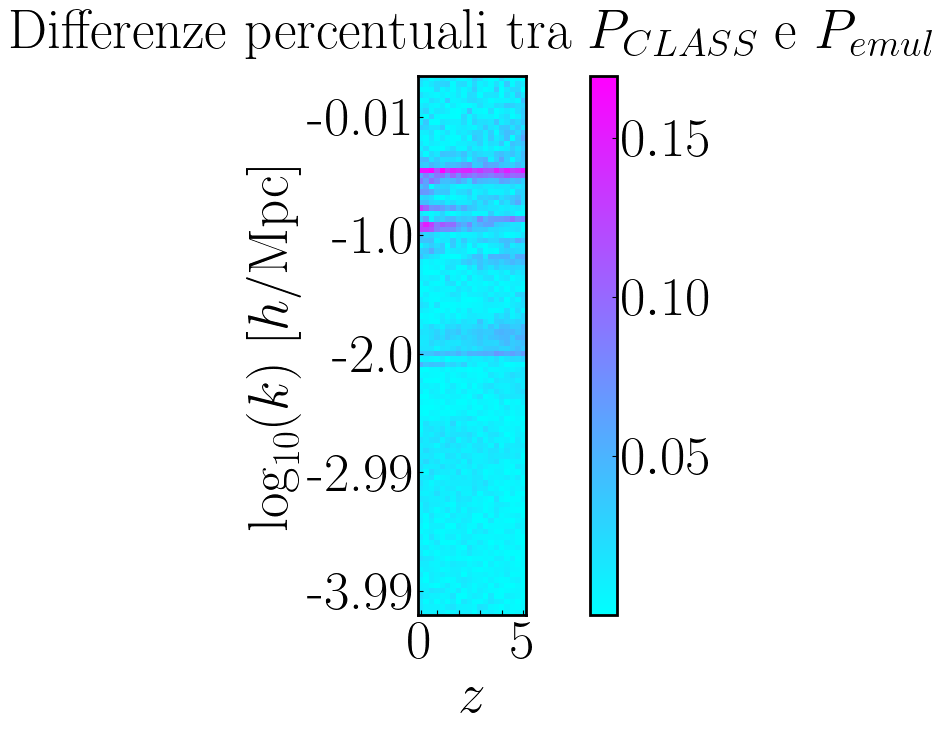

In [234]:
# heatmap

diffs0 = np.zeros([nk,nz])

for k in range(nk) :
    for z in range (nz) :
        diffs0[k,z] = 100 * np.abs(1 - pkz_pred[0,k,z]/pkz_class[0,k,z])

plt.figure(figsize=(8,7))
plt.imshow(diffs0, origin='lower', cmap='cool')

plt.xlabel('$z$')
zindex = np.linspace(0,19,6).astype(int)
plt.xticks(zindex, labels=[int(zz[zindex[0]]), None, None, None, None, int(zz[zindex[-1]])])

plt.ylabel('$\log_{10}(k)$ [$h$/Mpc]')
#ktarget = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1, 3])
ktarget = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1])
kindex = np.array([np.argsort(np.abs(kk - val))[0] for val in ktarget])
plt.yticks(kindex, np.around(np.log10(kk[kindex]), 2))

plt.title(r'Differenze percentuali tra $P_{CLASS}$ e $P_{emul}$', pad=20)

#plt.subplots_adjust(right=0.8)
plt.subplots_adjust(left=-0.7)

plt.colorbar()

plt.savefig('../plots/diff_nn+sr_hmap.pdf')
plt.show()

In [235]:
diff = 100 * np.abs(1 - pkz_pred/pkz_class)
diff_nn = 100 * np.abs(1 - pkz_pred_nn/pkz_class_nn)

diffs = [np.sort(diff, axis=0), np.sort(diff_nn, axis=0)]

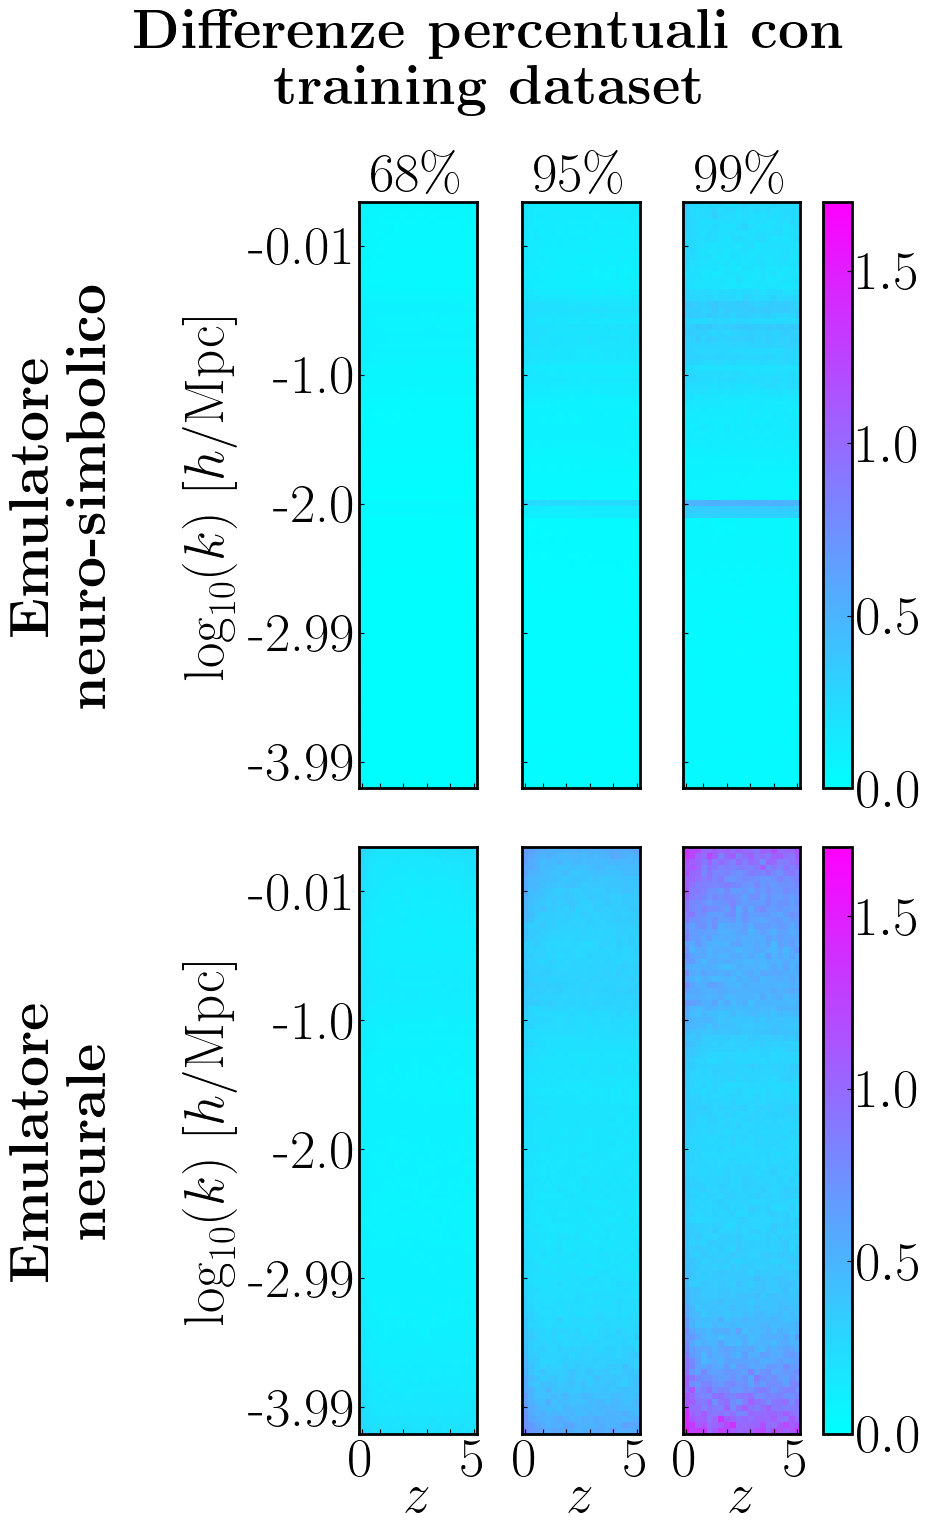

In [236]:
# heatmap training dataset

fig, axs = plt.subplots(2, 3, figsize=(10, 16), gridspec_kw={'hspace': 0.1, 'wspace': -0.8, 'width_ratios': [1, 1, 0.74]})

perc = [68, 95, 99]
zindex = np.linspace(0,19,6).astype(int)
ktarget = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1])
kindex = np.array([np.argsort(np.abs(kk - val))[0] for val in ktarget])

for i in range(2) :
    for j in range(3) :
        ind = int((diffs[i].shape[0]/100)*perc[j])
        map = axs[i,j].imshow(diffs[i][ind,:,:], origin='lower', cmap='cool')
        map.set_clim(0,1.7)

        axs[1,j].set_xlabel('$z$', labelpad=-10)
        axs[1,j].set_xticks(zindex, labels=[int(zz[zindex[0]]), None, None, None, None, int(zz[zindex[-1]])])
        axs[0,j].set_xticks(zindex, labels=[None, None, None, None, None, None])

        axs[i,0].set_yticks(kindex, np.around(np.log10(kk[kindex]), 2))
        axs[i,1].set_yticks(kindex, [None, None, None, None, None])
        axs[i,2].set_yticks(kindex, [None, None, None, None, None])

        axs[0,j].set_title(str(perc[j]) + '\%')

axs[0,0].set_ylabel(r'\textbf{Emulatore}' '\n' r'\textbf{neuro-simbolico}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=8)
axs[1,0].set_ylabel(r'\textbf{Emulatore}' '\n' r'\textbf{neurale}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=8)
#axs[0,0].set_ylabel(r'\textbf{Neuro-Symbolic Emulator}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=8)
#axs[1,0].set_ylabel(r'\textbf{NN Emulator}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=8)

fig.suptitle(r'\textbf{Differenze percentuali con}' '\n' r'\textbf{training dataset}', x=0.5, y=1, fontsize=size)
#fig.suptitle(r'\textbf{Percentage difference with training dataset}', x=0.5, y=0.97, fontsize=size)

fig.colorbar(map, ax=axs[0,2])
fig.colorbar(map, ax=axs[1,2])

plt.savefig('../plots/hmap_train.png')
plt.savefig('../plots/hmap_train.pdf')
plt.show()

In [237]:
diff_v = 100 * np.abs(1 - pkz_pred_v/pkz_class_v)
diff_nn_v = 100 * np.abs(1 - pkz_pred_nn_v/pkz_class_nn_v)

diffs_v = [np.sort(diff_v, axis=0), np.sort(diff_nn_v, axis=0)]


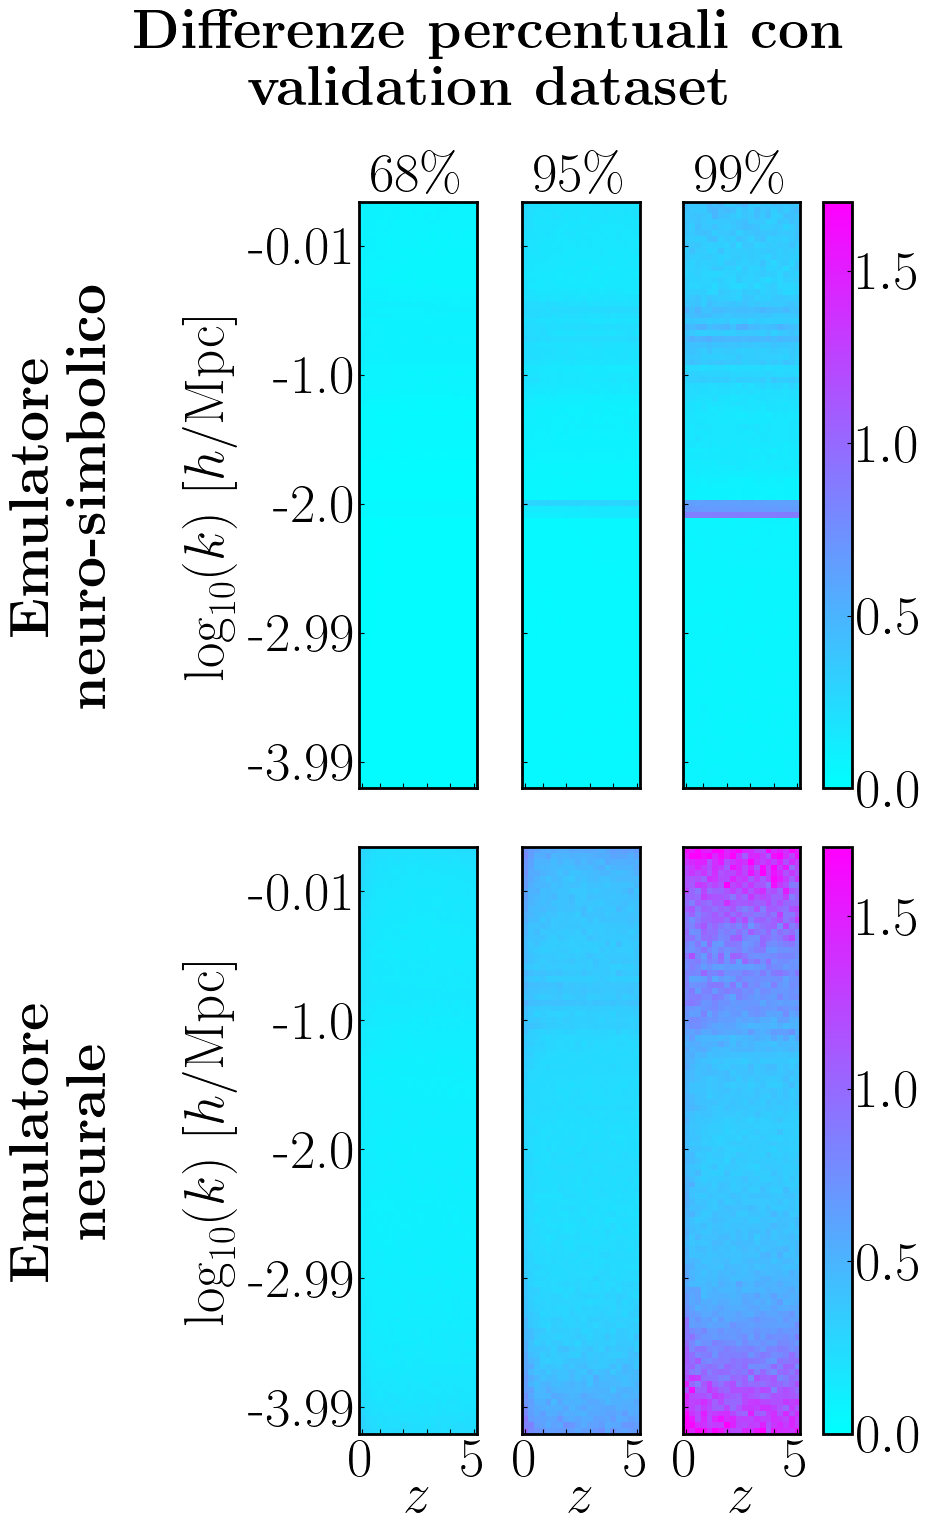

In [238]:
# heatmap validation dataset

fig, axs = plt.subplots(2, 3, figsize=(10, 16), gridspec_kw={'hspace': 0.1, 'wspace': -0.8, 'width_ratios': [1, 1, 0.74]})

perc = [68, 95, 99]
zindex = np.linspace(0,19,6).astype(int)
ktarget = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1])
kindex = np.array([np.argsort(np.abs(kk - val))[0] for val in ktarget])

for i in range(2) :
    for j in range(3) :
        ind = int((diffs_v[i].shape[0]/100)*perc[j])
        map = axs[i,j].imshow(diffs_v[i][ind,:,:], origin='lower', cmap='cool')
        map.set_clim(0,1.7)
        
        axs[1,j].set_xlabel('$z$', labelpad=-10)
        axs[i,j].set_xticks(zindex, labels=[int(zz[zindex[0]]), None, None, None, None, int(zz[zindex[-1]])])
        axs[0,j].set_xticks(zindex, labels=[None, None, None, None, None, None])

        axs[i,0].set_yticks(kindex, np.around(np.log10(kk[kindex]), 2))
        axs[i,1].set_yticks(kindex, [None, None, None, None, None])
        axs[i,2].set_yticks(kindex, [None, None, None, None, None])

        axs[0,j].set_title(str(perc[j]) + '\%')

axs[0,0].set_ylabel(r'\textbf{Emulatore}' '\n' r'\textbf{neuro-simbolico}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=8)
axs[1,0].set_ylabel(r'\textbf{Emulatore}' '\n' r'\textbf{neurale}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=8)
#axs[0,0].set_ylabel(r'\textbf{Neuro-Symbolic Emulator}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=8)
#axs[1,0].set_ylabel(r'\textbf{NN Emulator}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=8)

fig.suptitle(r'\textbf{Differenze percentuali con}' '\n' r'\textbf{validation dataset}', x=0.5, y=1, fontsize=size)
#fig.suptitle(r'\textbf{Percentage difference with validation dataset}', x=0.5, y=0.97, fontsize=size)

fig.colorbar(map, ax=axs[0,2])
fig.colorbar(map, ax=axs[1,2])

plt.savefig('../plots/hmap_val.png')
plt.savefig('../plots/hmap_val.pdf')
plt.show()

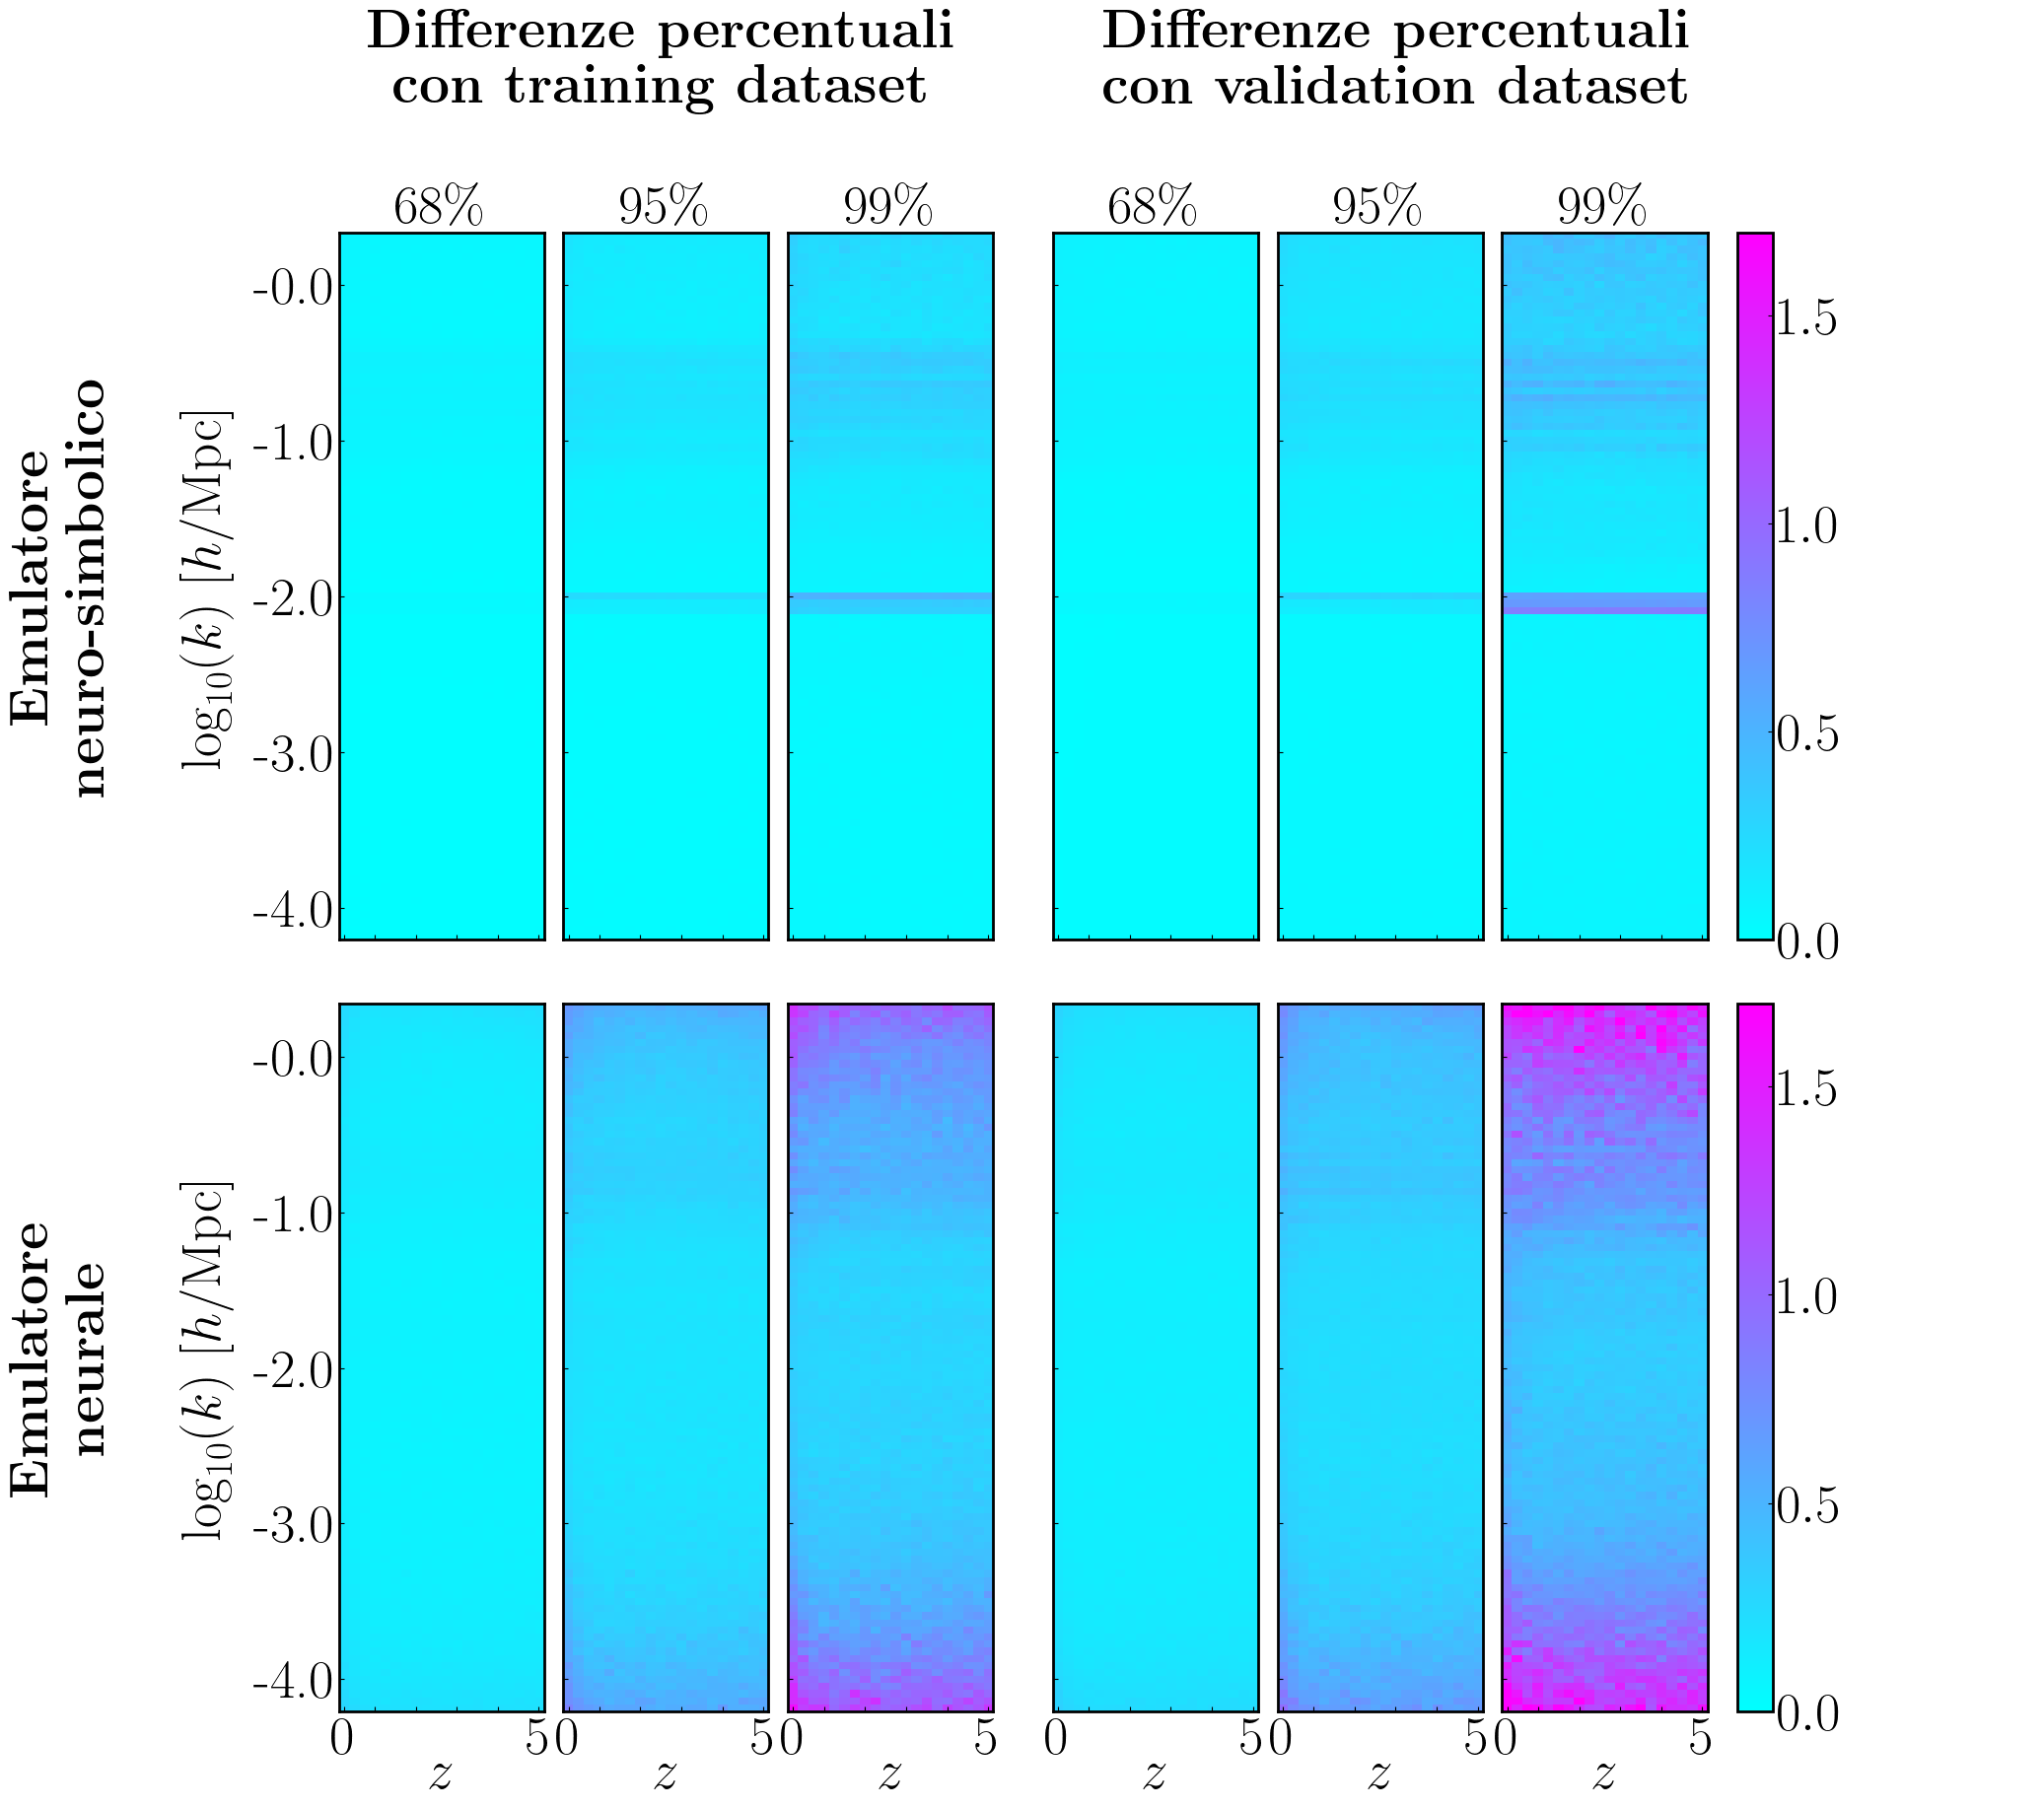

In [268]:
# heatmap totale

fig, axs = plt.subplots(2, 8, figsize=(20, 20), gridspec_kw={'hspace': 0.09, 'wspace': 0.1, 'width_ratios': [1, 1, 1, 0.1, 1, 1, 1, 1.5]})

perc = [68, 95, 99]
zindex = np.linspace(0,19,6).astype(int)
ktarget = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1])
kindex = np.array([np.argsort(np.abs(kk - val))[0] for val in ktarget])

for i in range(2) :
    for j in range(3) :
        ind = int((diffs[i].shape[0]/100)*perc[j])
        map = axs[i,j].imshow(diffs[i][ind,:,:], origin='lower', cmap='cool', aspect='auto')
        map.set_clim(0,1.7)

        axs[1,j].set_xlabel('$z$', labelpad=-10)
        axs[1,j].set_xticks(zindex, labels=[int(zz[zindex[0]]), None, None, None, None, int(zz[zindex[-1]])])
        axs[0,j].set_xticks(zindex, labels=[None, None, None, None, None, None])

        axs[i,0].set_yticks(kindex, np.around(np.log10(kk[kindex]), 0))
        axs[i,1].set_yticks(kindex, [None, None, None, None, None])
        axs[i,2].set_yticks(kindex, [None, None, None, None, None])

        axs[0,j].set_title(str(perc[j]) + '\%')

    for j in range(3) :
        t = j+4
        ind = int((diffs_v[i].shape[0]/100)*perc[j])
        map = axs[i,t].imshow(diffs_v[i][ind,:,:], origin='lower', cmap='cool', aspect='auto')
        map.set_clim(0,1.7)
        
        axs[1,t].set_xlabel('$z$', labelpad=-10)
        axs[i,t].set_xticks(zindex, labels=[int(zz[zindex[0]]), None, None, None, None, int(zz[zindex[-1]])])
        axs[0,t].set_xticks(zindex, labels=[None, None, None, None, None, None])

        axs[i,t].set_yticks(kindex, [None, None, None, None, None])

        axs[0,t].set_title(str(perc[j]) + '\%')
    
    axs[i,3].axis('off')
    axs[i,7].axis('off')


axs[0,0].set_ylabel(r'\textbf{Emulatore}' '\n' r'\textbf{neuro-simbolico}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=15)
axs[1,0].set_ylabel(r'\textbf{Emulatore}' '\n' r'\textbf{neurale}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=15)
#axs[0,0].set_ylabel(r'\textbf{Neuro-Symbolic Emulator}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=8)
#axs[1,0].set_ylabel(r'\textbf{NN Emulator}' '\n\n $\log_{10}(k)$ [$h$/Mpc]', labelpad=8)

#fig.suptitle(r'\textbf{Differenze percentuali con}' '\n' r'\textbf{training dataset}', x=0.5, y=1, fontsize=size)
#fig.suptitle(r'\textbf{Percentage difference with training dataset}', x=0.5, y=0.97, fontsize=size)

# Creazione degli assi per i titoli sopra le colonne di sinistra e destra
title_ax_left = fig.add_subplot(2, 3, (1, 1), frameon=False)
title_ax_right = fig.add_subplot(2, 3, (2, 3), frameon=False)

# Rimozione degli assi per i titoli
title_ax_left.axis('off')
title_ax_right.axis('off')

# Aggiunta dei titoli
title_ax_left.set_title(r'\textbf{Differenze percentuali}' '\n' r'\textbf{con training dataset}', x=0.65, y=1.18, fontsize=size)
title_ax_right.set_title(r'\textbf{Differenze percentuali}' '\n' r'\textbf{con validation dataset}', x=0.42, y=1.18, fontsize=size)

cbar_ns = fig.colorbar(map, ax=axs[0,7], location='left')
cbar_ns.ax.yaxis.set_ticks_position('right')
cbar_nn = fig.colorbar(map, ax=axs[1,7], location='left')
cbar_nn.ax.yaxis.set_ticks_position('right')

plt.subplots_adjust(left=0.19, right=1.05, top=0.85, bottom=0.1)

plt.savefig('../plots/hmap.pdf')
plt.show()